In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/NLP/yelp.csv',parse_dates=['date'])

# 2-4 เขียนโค้ดแสดง หัว10แถว ท้าย10แถว สุ่ม10แถว info และ describe อธิบายข้อมูลเบื้องต้น และใช้ pairplot ดูความสัมพันธ์เบื้องต้น


In [ ]:
df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [ ]:
df.tail(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2
9993,maB4VHseFUY2TmPtAQnB9Q,2011-06-27,SNnyYHI9rw9TTltVX3TF-A,4,"Judging by some of the reviews, maybe I went o...",review,T46gxPbJMWmlLyr7GxQLyQ,1,1,0
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [ ]:
df.sample(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
3487,FV0BkoGOd3Yu_eJnXY15ZA,2012-09-03,txNFKQGKG1XDBa7h1u4hYg,4,Good Date Night Spot!!! Went here the other n...,review,kWq7Imvce6pLqHaccV1zbw,0,0,0
5085,D1T1jtCfTfXD-cQE3QViow,2011-09-10,_7IJAWxTgGA6ir8mkV7f7Q,5,Super friendly. Joe was there greeting everyon...,review,8DqQNOVzZZqSCHdXI945eA,0,1,0
9478,NcJ4Ug6EX4t_WBh3E0mXhA,2012-01-11,l-CJ8jVBvdSJOWLqV3nYvw,5,"An organized & clean store, a well educated & ...",review,Xvw4kRnBNvOT4ZrpJHKifA,0,0,0
5571,bzDs0u8I-z231QVdIQWkrA,2011-01-06,RMkq-Sk1roD-7s9q79wb4A,5,"In being a bit of a burrito man, I was suspici...",review,3TXEOX7mWcvkdXPmAP3LYg,0,0,0
4731,aRkYtXfmEKYG-eTDf_qUsw,2012-08-02,yWIqxHTOfszPjBoy0q4-pw,4,Great stop for a fast breakfast - the hubs had...,review,KTMqiNYmGBzenePbCVLa-g,0,1,0
5649,fP-BPL6iRu2tbcvlnjRshw,2011-06-19,rv__rAMkqKW5W5qwILO6sw,5,We stopped in to Copper Blues on Friday night ...,review,TIZvHaRMMph2udRx3yJ5dw,2,1,1
4192,8Hn5X1AqgmSLHRG2KgBJBg,2012-09-01,QxXZTYE3fDSOZwl0QPcuMQ,3,I ordered a thin crust pizza for carry out fro...,review,_bHzW18Vg1gxTMoR1fFZhA,0,0,0
1405,8vLEHHZJ-dk8M32bYti7eQ,2010-10-15,P9eUtYCx4TQCdAwZTd0bpA,2,The customer service here could be 100% better...,review,ekMRQH5dkzB2mglNBcNh7Q,0,0,0
1828,XuSSzunh_LnO7VIMKNc-eQ,2012-04-08,LPJ1icmpCDZA8VQe7X8Fdw,1,Got a padi and the tech stopped for a while to...,review,Qc3mQL34qq0Eo6dbU00ZTg,0,0,0
5516,AryNioF9fxl8RYGiIE7fSA,2012-10-04,gAwXPbAmmy73sbGPhrvXmw,3,I think this place is hyped up a little more t...,review,Mgm6xZjahS3HD7qqOyGtbQ,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   business_id  10000 non-null  object        
 1   date         10000 non-null  datetime64[ns]
 2   review_id    10000 non-null  object        
 3   stars        10000 non-null  int64         
 4   text         10000 non-null  object        
 5   type         10000 non-null  object        
 6   user_id      10000 non-null  object        
 7   cool         10000 non-null  int64         
 8   useful       10000 non-null  int64         
 9   funny        10000 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


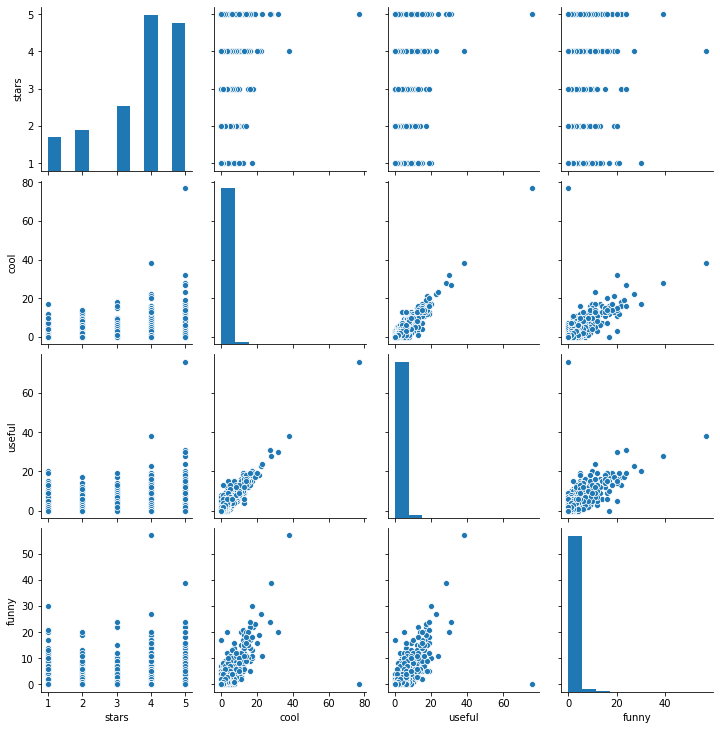

In [ ]:
sns.pairplot(df)

# 5-12

5-7 เช็คว่ารีวิวมีปีไหนบ้าง ละแต่ละปีมีจำนวนรีวิวเท่าไหร่ ,
เช็คว่ารีวิวมีเดือนไหนบ้าง ละแต่ละเดือนจำนวนรีวิวเท่าไหร่ ,
เช็คเดือนและปีที่เท่าไหร่มีคนรีวิวมากที่สุด และน้อยที่สุด


In [ ]:
df.drop(df.columns[[0,2,6]],axis = 1,inplace=True)

In [ ]:
df.sample(5)

,date,stars,text,type,cool,useful,funny
5464,2011-05-06,4,"I'm not going to lie, Pizzeria Bianco's food w...",review,1,2,0
9655,2010-04-17,5,I am in love with Yogurtland fro yo!! It is s...,review,0,0,0
5036,2008-10-21,3,So I ventured in here today for a quick nosy h...,review,0,0,0
497,2012-06-12,4,Always here for their California burritos... T...,review,0,0,0
8084,2009-04-16,4,"Eat, drink, be merry.\n\nLove the atmosphere. ...",review,2,2,2


In [ ]:
df['year'] = df.iloc[:,0].dt.year
df['month'] = df.iloc[:,0].dt.month

In [ ]:
df.iloc[:,7].value_counts()

2012    3025
2011    2791
2010    1852
2009    1171
2008     765
2007     285
2006      55
2013      52
2005       4
Name: year, dtype: int64

In [ ]:
df.iloc[:,8].value_counts()

8     927
1     923
3     905
7     891
5     848
4     841
10    814
12    812
9     784
6     780
2     739
11    736
Name: month, dtype: int64

In [ ]:
df['y+m'] = df.pop('year').astype(str) + '_' + df.pop('month').astype(str)

In [ ]:
df.sample(5)

,date,stars,text,type,cool,useful,funny,y+m
7803,2012-05-28,1,I'm sad to report that we dined here for lunch...,review,0,2,0,2012_5
5976,2012-07-30,4,"Sharp looking place modern meets old dinner, g...",review,0,0,0,2012_7
751,2011-08-12,5,I love cupcakes. Its true. I really do. I have...,review,0,1,0,2011_8
124,2012-03-30,5,I love this restaurant!! I have been a fan of ...,review,1,0,0,2012_3
1447,2009-08-10,5,"Awesome, awesome, awesome....everything was fa...",review,1,0,0,2009_8


In [ ]:
df.iloc[:,7].value_counts()

2012_1     304
2012_7     281
2012_5     275
2012_6     272
2011_8     266
          ... 
2005_7       2
2006_4       2
2005_12      1
2006_5       1
2005_4       1
Name: y+m, Length: 87, dtype: int64

8 สร้าง Countplot ของ stars

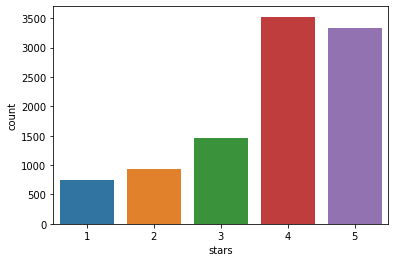

In [ ]:
sns.countplot(df.iloc[:,1])

9 หา Correlation ของ DataFrame


In [ ]:
df.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


### 10-12 ช้ plotly หา pie chart แบบ sum ของฟีเจอร์ cool แบ่งตาม stars , ใช้ plotly หา pie chart แบบ mean ของฟีเจอร์ useful แบ่งตาม stars , ใช้ plotly หา pie chart แบบ mean ของฟีเจอร์ funny แบ่งตาม stars


In [ ]:
df2 = df['cool'].groupby(df['stars']).sum()

fig = px.pie(df2,values=df2.values,names=df2.index,title='cool vs sum of stars')
fig.show()

In [ ]:
df2 = df['useful'].groupby(df['stars']).mean()

fig = px.pie(df2,values=df2.values,names=df2.index,title='useful vs mean of stars')
fig.show()

In [ ]:
df2 = df['funny'].groupby(df['stars']).mean()

fig = px.pie(df2,values=df2.values,names=df2.index,title='funny vs mean of stars')
fig.show()

# 13 หาความยาวของ text ในแต่ละแถวแล้วเพิ่มเป็นคอลัมน์ใหม่

In [ ]:
df['len'] = df.iloc[:,2].apply(len)
df.drop(df.columns[[7]],axis = 1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10000 non-null  datetime64[ns]
 1   stars   10000 non-null  int64         
 2   text    10000 non-null  object        
 3   type    10000 non-null  object        
 4   cool    10000 non-null  int64         
 5   useful  10000 non-null  int64         
 6   funny   10000 non-null  int64         
 7   len     10000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 625.1+ KB


# 14 หา histogram ของความยาวของ text แบ่งตาม stars โดย plot คนละ subplot


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5015c85f98>,
      dtype=object)

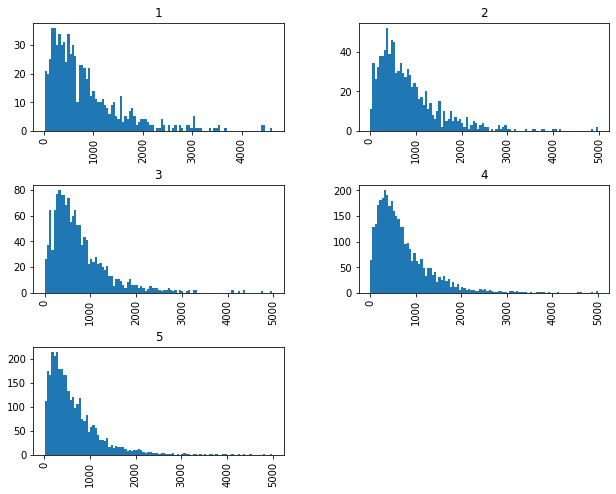

In [ ]:
df.hist(column=df.columns[7],by=df.columns[1],bins=100,figsize=(10,8))

15

# 15-20

18. เขียนฟังก์ชั่นรวมที่ ลบ punctuation และ ลบ stopwords

In [ ]:
def text_process(mess):
  no_punc = ''.join([x for x in mess if x not in string.punctuation])
  text = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
  return text

In [ ]:
df.iloc[:,2].head(5).apply(text_process)

0    [wife, took, birthday, breakfast, excellent, w...
1    [idea, people, give, bad, reviews, place, goes...
2    [love, gyro, plate, Rice, good, also, dig, can...
3    [Rosie, Dakota, LOVE, Chaparral, Dog, Park, co...
4    [General, Manager, Scott, Petello, good, egg, ...
Name: text, dtype: object

19 ทำ Bag-Of-Words โดยใช้ Analyzer เป็น ฟังก์ชั่นที่ลบ punctuation และ ลบ stopwords

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df.iloc[:,2])
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7f5013ebd6a8>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
len(bow_transformer.vocabulary_)

44012

In [ ]:
bow_df = bow_transformer.transform(df.iloc[:,2])

In [ ]:
bow_df

<10000x44012 sparse matrix of type '<class 'numpy.int64'>'
	with 583230 stored elements in Compressed Sparse Row format>

In [ ]:
bow_df.nnz

583230

หา % ของ Sparsity 

In [ ]:
print('% Sparsity ',bow_df.nnz*100/(bow_df.shape[0]*bow_df.shape[1]))

% Sparsity  0.13251613196400983


ทำ TF-IDF


In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_df)

In [ ]:
tfidf_transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [ ]:
tfidf_df = tfidf_transformer.transform(bow_df)

In [ ]:
tfidf_df

<10000x44012 sparse matrix of type '<class 'numpy.float64'>'
	with 583230 stored elements in Compressed Sparse Row format>

# 21-23 สร้าง Classifier และทดสอบ
 

In [ ]:
y = df.iloc[:,[1]]

In [ ]:
X = tfidf_df

In [ ]:
X_train , X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=100)

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_predict = nb.predict(X_test)

In [ ]:
y_predict

array([4, 4, 5, ..., 4, 4, 5])

In [ ]:
confusion_matrix(y_test,y_predict)

array([[  0,   0,   0, 132,  22],
       [  0,   0,   0, 190,  11],
       [  0,   0,   0, 278,   8],
       [  0,   0,   0, 641,  56],
       [  0,   0,   0, 451, 211]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



(0.426, 0.1943355499648302, 0.2127813085259894, 0.24767735699393603)

# 24-25 สร้าง Data Pipeline และทดสอบ

In [ ]:
X_train , X_test,y_train,y_test = train_test_split(df.iloc[:,2],df.iloc[:,1],train_size = 0.8,random_state=100)

In [ ]:
pl = Pipeline([
               ('bow',CountVectorizer(analyzer=text_process)),
               ('tfidf',TfidfTransformer()),
               ('classifier',MultinomialNB())
])

In [ ]:
pl.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f5013ebd6a8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
y_predict = pl.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[  0,   0,   0, 132,  22],
       [  0,   0,   0, 190,  11],
       [  0,   0,   0, 278,   8],
       [  0,   0,   0, 639,  58],
       [  0,   0,   0, 446, 216]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



(0.4275, 0.1957387674704604, 0.212988554472234, 0.2486140429202408)

# 26 เขียนโค้ดใหม่ทั้งหมด โดยไม่ทำ TF-IDF และประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision 
อธิบายว่าแบบมี TF-IDF หรือไม่มีดีกว่า เพราะเหตุใด?

จากการประเมินผล การไม่ทำ TF-IDF ให้ผลที่ประเมินดีกว่า ดังนั้น ไม่มี TF-IDF จึงดีกว่า 


In [ ]:
y = df.iloc[:,[1]]

In [ ]:
X = bow_df

In [ ]:
X_train , X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=100)

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_predict = nb.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[ 29,  10,  12,  75,  28],
       [ 14,   7,  18, 144,  18],
       [  1,   3,  13, 237,  32],
       [  1,   2,  16, 499, 179],
       [  3,   1,   5, 295, 358]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.453, 0.2994374008013106, 0.4185906627783669, 0.30506059949009784)